# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Scrape the website
html = browser.html

# Create a Beautiful Soup object
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
all_elements = soup.find_all()

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
rows = []

In [15]:
for item in all_elements:
    print(item)

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<main>
<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>

In [13]:
# Iterate through the scraped data
for row in all_elements:
    # Extract <td> tags from the row
    cells = row.find_all('td')
    
     # Extract relevant information from the <td> tags
    id = cells[0].text if len(cells) > 0 else None
    terrestrial_date = cells[1].text if len(cells) > 1 else None
    sol = cells[2].text if len(cells) > 2 else None
    ls = cells[3].text if len(cells) > 3 else None
    month = cells[4].text if len(cells) > 4 else None
    min_temp = cells[5].text if len(cells) > 5 else None
    pressure = cells[6].text if len(cells) > 6 else None
    
    # Create a row as a list
    row_data = [id, terrestrial_date, sol, ls, month, min_temp, pressure]
    
    # Append the row to the list of rows
    rows.append(row_data)

# Define column names
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [14]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(rows, columns=columns)

In [15]:
# Confirm DataFrame was created successfully
df

id terrestrial_date   sol    ls month min_temp pressure
0         2       2012-08-16    10   155     6    -75.0    739.0
1         2       2012-08-16    10   155     6    -75.0    739.0
2      None             None  None  None  None     None     None
3      None             None  None  None  None     None     None
4      None             None  None  None  None     None     None
...     ...              ...   ...   ...   ...      ...      ...
14986  None             None  None  None  None     None     None
14987  None             None  None  None  None     None     None
14988  None             None  None  None  None     None     None
14989  None             None  None  None  None     None     None
14990  None             None  None  None  None     None     None

[14991 rows x 7 columns]

### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [16]:
# Examine data type of each column
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [18]:
# Change data types for data analysis
df['id'] = df['id'].astype('object')
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].fillna(0).astype('int64')  # Fill missing values with 0
df['ls'] = df['ls'].fillna(0).astype('int64')    # Fill missing values with 0
df['month'] = df['month'].fillna(0).astype('int64')  # Fill missing values with 0
df['min_temp'] = df['min_temp'].astype('float64')

In [19]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                    object
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [20]:
# 1. How many months are there on Mars?
num_months = df['month'].nunique()
num_months

13

In [21]:
# 2. How many Martian days' worth of data are there?
num_sols = len(df)
num_sols

14991

In [22]:
# 3. What is the average low temperature by month?
average_low_temp_by_month = df.groupby('month')['min_temp'].mean()
average_low_temp_by_month

month
0           NaN
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.282051
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

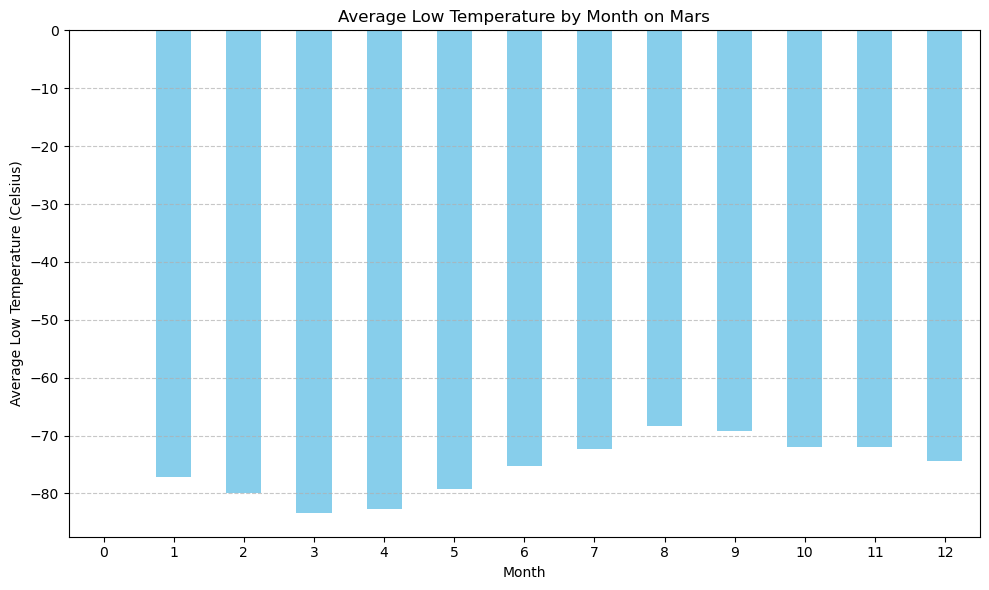

In [23]:
# Plot the average temperature by month
plt.figure(figsize=(10, 6))
average_low_temp_by_month.plot(kind='bar', color='skyblue')
plt.title('Average Low Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature (Celsius)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

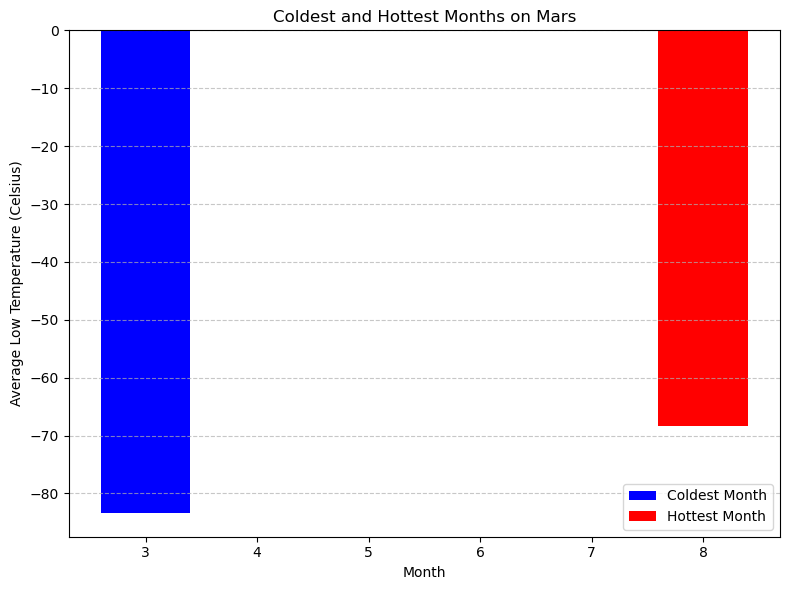

In [24]:
# Identify the coldest and hottest months in Curiosity's location
# Find the coldest and hottest months
coldest_month = average_low_temp_by_month.idxmin()
hottest_month = average_low_temp_by_month.idxmax()

# Get the average temperatures of the coldest and hottest months
coldest_temp = average_low_temp_by_month[coldest_month]
hottest_temp = average_low_temp_by_month[hottest_month]

# Plotting the bar graph
plt.figure(figsize=(8, 6))
plt.bar(coldest_month, coldest_temp, color='blue', label='Coldest Month')
plt.bar(hottest_month, hottest_temp, color='red', label='Hottest Month')
plt.title('Coldest and Hottest Months on Mars')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature (Celsius)')
plt.legend()
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [26]:
# 4. Average pressure by Martian month
for month, avg_temp in average_low_temp_by_month.items():
    print(f"Month: {month}, Average Temperature: {avg_temp:.2f} Celsius")

Month: 0, Average Temperature: nan Celsius
Month: 1, Average Temperature: -77.16 Celsius
Month: 2, Average Temperature: -79.93 Celsius
Month: 3, Average Temperature: -83.31 Celsius
Month: 4, Average Temperature: -82.75 Celsius
Month: 5, Average Temperature: -79.31 Celsius
Month: 6, Average Temperature: -75.28 Celsius
Month: 7, Average Temperature: -72.28 Celsius
Month: 8, Average Temperature: -68.38 Celsius
Month: 9, Average Temperature: -69.17 Celsius
Month: 10, Average Temperature: -71.98 Celsius
Month: 11, Average Temperature: -71.99 Celsius
Month: 12, Average Temperature: -74.45 Celsius


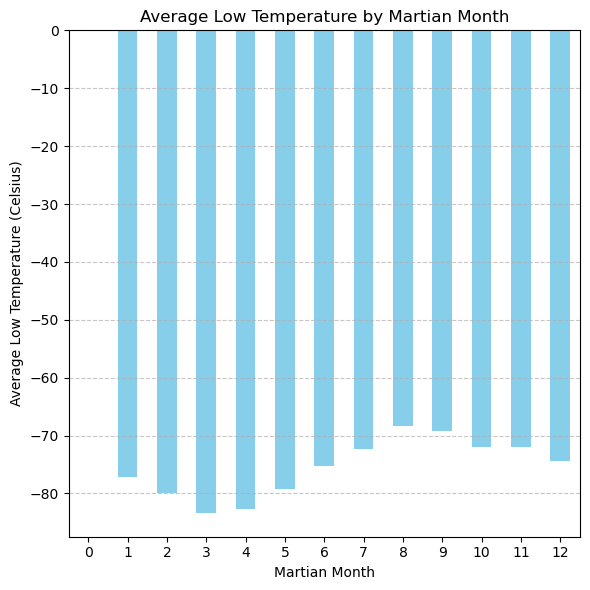

In [28]:
# Plot the average pressure by month
plt.figure(figsize=(6, 6))
average_low_temp_by_month.plot(kind='bar', color='skyblue')
plt.title('Average Low Temperature by Martian Month')
plt.xlabel('Martian Month')
plt.ylabel('Average Low Temperature (Celsius)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

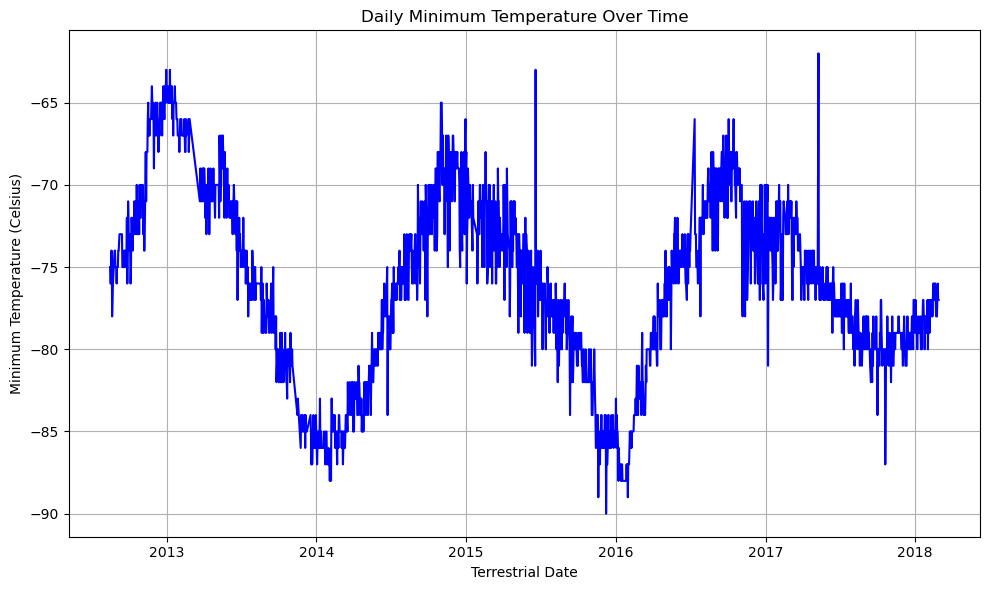

In [36]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Convert 'terrestrial_date' column to datetime format
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Drop rows with missing temperature data
df.dropna(subset=['min_temp'], inplace=True)

# Plotting the daily minimum temperature over time
plt.figure(figsize=(10, 6))
plt.plot(df['terrestrial_date'], df['min_temp'], color='blue')
plt.title('Daily Minimum Temperature Over Time')
plt.xlabel('Terrestrial Date')
plt.ylabel('Minimum Temperature (Celsius)')
plt.grid(True)
plt.tight_layout()
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [38]:
# Write the data to a CSV
df.to_csv('mars_data.csv', index=False)

In [39]:
browser.quit()